In [1]:
# Importing the drive module from google.colab library
from google.colab import drive

# Mounting the Google Drive to the Colab environment
drive.mount('/content/drive')

project_path = '/content/drive/My Drive/MSc_Thesis/'

import os
os.chdir(project_path)

Mounted at /content/drive


In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

lr_data_path='input_data/deg/1x1/'
mr_data_path='input_data/deg/0_5x0_5/'
hr_data_path='input_data/deg/0_25x0_25/'

## Min and Max t2m values for each year from 2000 to 2020

Min of all years:  210.58110046386722
Max of all years:  325.91046142578136


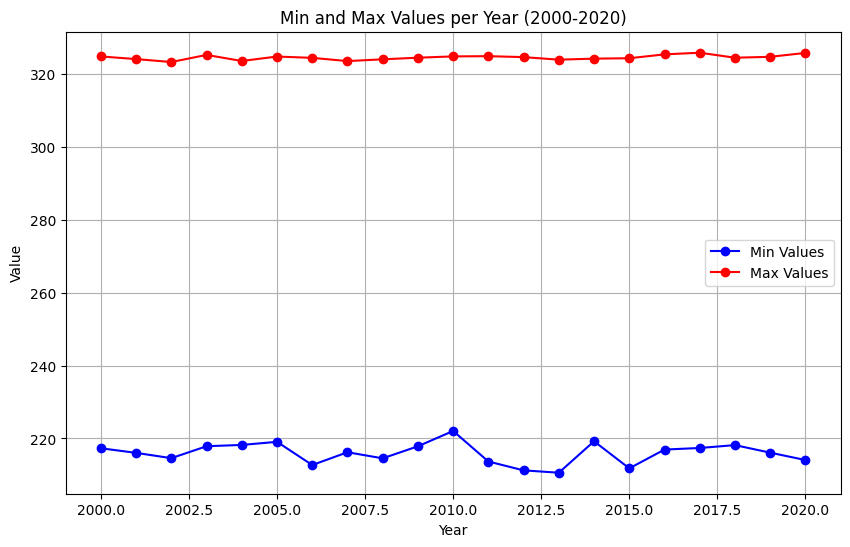

In [6]:
min_values = []
max_values = []
years = list(range(2000, 2021))
for year in years:
    input_file_50 = os.path.join(project_path, lr_data_path,  str(year)+'_t2m_sfc.npy')
    input_data_50 = np.load(input_file_50)
    min_values.append(np.min(input_data_50))
    max_values.append(np.max(input_data_50))

print("Min of all years: ", np.min(min_values))
print("Max of all years: ", np.max(max_values))

plt.figure(figsize=(10, 6))
plt.plot(years, min_values, label='Min Values', marker='o', color='blue')
plt.plot(years, max_values, label='Max Values', marker='o', color='red')

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Min and Max Values per Year (2000-2020)')
plt.legend()

plt.grid(True)
plt.show()

## Grid values distribution

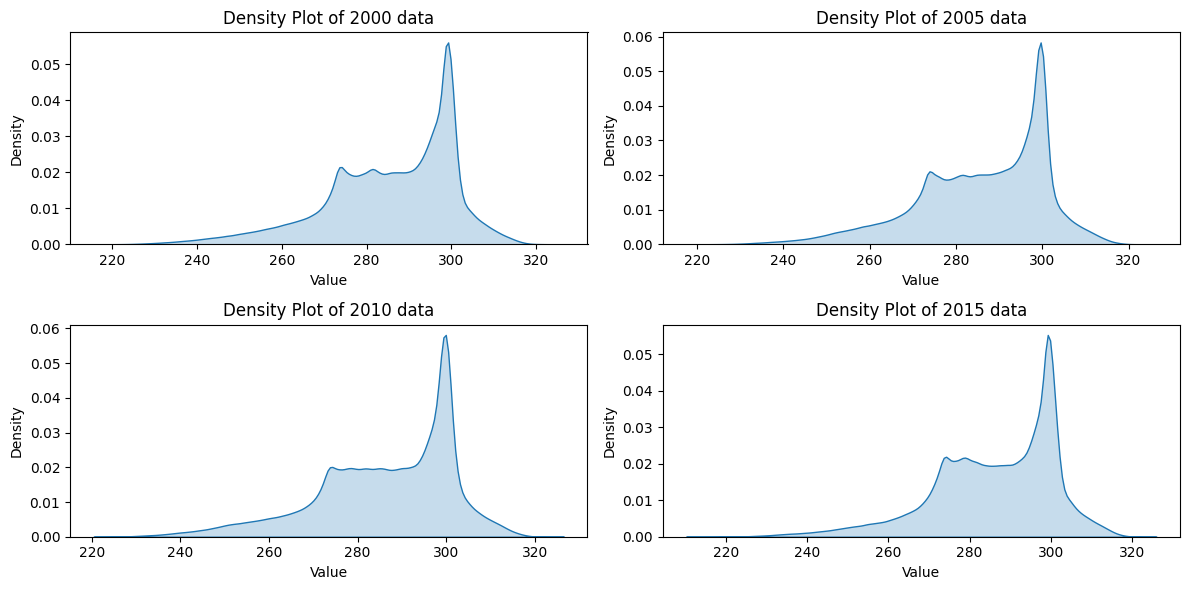

In [7]:
def plot_density(data, ax, title):
    data_flat = data.flatten()
    sns.kdeplot(data_flat, fill=True, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')

fig, axes = plt.subplots(2, 2, figsize=(12, 6))

for year in range(2000, 2020, 5):
  input_file_100 = os.path.join(project_path, lr_data_path,  str(year)+'_t2m_sfc.npy')
  input_data_100 = np.load(input_file_100)

  plot_density(input_data_100, axes[year // 2010, year % 2], 'Density Plot of '+str(year)+' data')

plt.tight_layout()
plt.show()

In [10]:
def compute_global_mean_std(file_paths, input_data_path):
    total_samples = 0
    running_mean = 0.0
    running_variance = 0.0

    # Compute mean and variance incrementally
    for file_path in file_paths:
        # Load entire file (assuming files are small enough to fit individually in memory)
        data = np.load(os.path.join(project_path, input_data_path, file_path)).reshape(-1)  # Flatten the data
        n_samples = len(data)

        # Incremental mean and variance
        total_samples += n_samples
        new_mean = np.mean(data)
        new_variance = np.var(data)

        # Update running mean and variance
        delta = new_mean - running_mean
        running_mean += delta * n_samples / total_samples
        running_variance += n_samples * (new_variance + delta**2 * (n_samples / total_samples))

    global_std = np.sqrt(running_variance / total_samples)
    return running_mean, global_std


file_paths = os.listdir(os.path.join(project_path, lr_data_path))

mean, std = compute_global_mean_std(file_paths, lr_data_path)
print("Low Resolution Data")
print(f"Global Mean: {mean}, Global Std: {std}")

file_paths = os.listdir(os.path.join(project_path, lr_data_path))

mean, std = compute_global_mean_std(file_paths, mr_data_path)
print("Medium Resolution Data")
print(f"Global Mean: {mean}, Global Std: {std}")

Low Resolution Data
Global Mean: 286.13519444891267, Global Std: 64.24024079867077
Medium Resolution Data
Global Mean: 286.2508998542185, Global Std: 64.25110193485646
